# Sampling causal sets with QeMCMC

This notebook is to show the reader how to run MCMC, either classical or quantum enhanced using this package



## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from helpers import *
from Sampler import Sampler
from tqdm import tqdm


/mnt/c/Users/Stuart Ferguson/OneDrive - University of Edinburgh/Documents/PhD/CODE/CST/SamplingCausalSets/SamplingCausalSets/.venv/lib/python3.13/site-packages/numpy/_core/getlimits.py:552: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


## Sampler object

The following code initialises a sampler object. Samplers can, depending on how they are initialised, run a classical or quantum sampling process. Of course, both should sample the same distribution, however if it is correctly initialised then the quantum method should sample more efficiently.

 * cardinality: The number of elements in the causal set
 * method: The sampling method to use, quantum or classical
 * dimension: The dimension of the BD action
 * cargs: The arguments required for classical sampling. A dictionary containing boolean values for keys "link_move" and "relation_move", corresponding to which classical move to choose (both can be true, in which case they atre both used with 50% chance at each sample.)

### Classical MCMC, sampling causal sets randomly

Sampling causal sets uniformly random isn't necessarily easy. The following is an example of the link and relation moves, which form an ergodic markov chain to explore the space of all causal sets of given cardinality, discussed in [Onset of the Asymptotic Regime for Finite Orders
](https://arxiv.org/abs/1504.05902).



cargs recieved :  {'link_move': True, 'relation_move': True}
------------------------------------------------------------
Starting classical algorithm with the following parameters:
Link move:  True
Relation move:  True


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 142.80it/s]


Time taken:  7.00691556930542  (per step:  0.006999915653651768 , per sample  0.0700691556930542 )
acceptance rate:  0.999000999000999
self move rate:  0.0
Results directory keys:  dict_keys(['bitstring_chain', 'sample_index', 'ordering_fractions', 'heights', 'num_relations', 'minimal_elements', 'BD_action'])


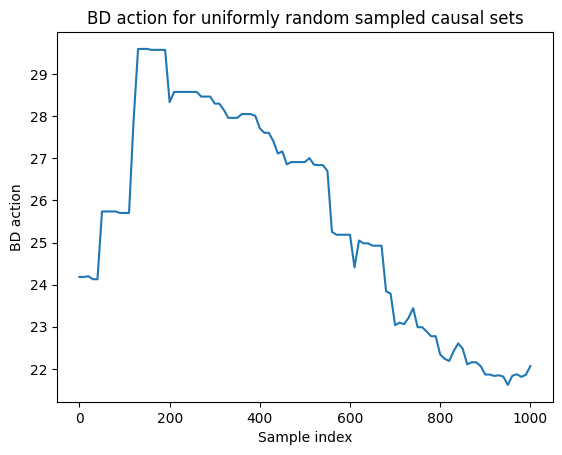

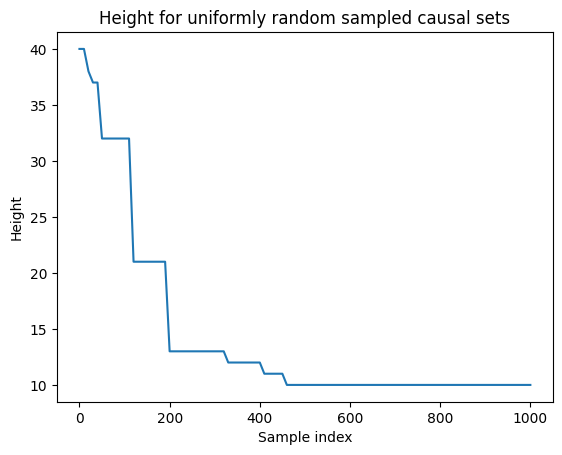

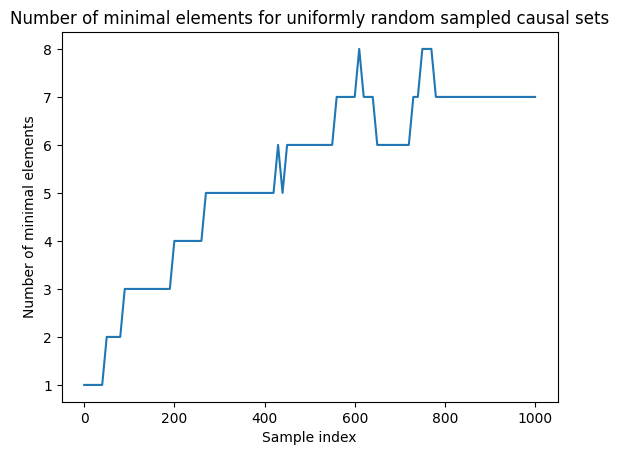

In [5]:
# Cardinality of causal set that we are interested in
cardinality = 40

# Initialise a classical sampler, that uses only the link move
csamp = Sampler(cardinality, method="classical", dimension = 4, cargs = {"link_move":True, "relation_move": True})

# Run the sampler for a uniform distribution
results_dir = csamp.sample_uniform(num_samples = 100, sample_frequency = 10, T_therm= 0)

print("Results directory keys: ", results_dir.keys())


plt.plot(results_dir["sample_index"], results_dir["BD_action"])
plt.xlabel("Sample index")
plt.ylabel("BD action")
plt.title("BD action for uniformly random sampled causal sets")
plt.show()

plt.plot(results_dir["sample_index"], results_dir["heights"])
plt.xlabel("Sample index")
plt.ylabel("Height")
plt.title("Height for uniformly random sampled causal sets")
plt.show()

plt.plot(results_dir["sample_index"], results_dir["minimal_elements"])
plt.xlabel("Sample index")
plt.ylabel("Number of minimal elements")
plt.title("Number of minimal elements for uniformly random sampled causal sets")
plt.show()




# Quantum algorithm

The quantum algorithm, uses time evolution of a specific hamiltonian, to create a superposition of configurations. 

If once selects the "quantum" method, they must provide 

* qargs: Dict containing keys "t", "gammas" and optionally some other arguments
    * t: The time of quantum evolution
    * gammas: List representing the relative weight of different Hamiltonian components (see documentation for full details)
        All items in list must add to 1. The first item controls the constraint term, the second the energy (BD-action) term, and the last represents the strength of the mixing.




Using  1  qubits out of  45
------------------------------------------------------------
Starting quantum algorithm with the following parameters:
gamma_TC:  0.9
gamma_BD:  0
gamma_mixing:  0.1
t:  10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:02<00:00,  2.76it/s]

Time taken:  362.4072070121765  (per step:  0.3620451618503262 , per sample  3.6240720701217652 )
acceptance rate:  0.36863136863136864
self move rate:  0.5344655344655345
Results directory keys:  dict_keys(['bitstring_chain', 'sample_index', 'ordering_fractions', 'heights', 'num_relations', 'minimal_elements', 'BD_action'])


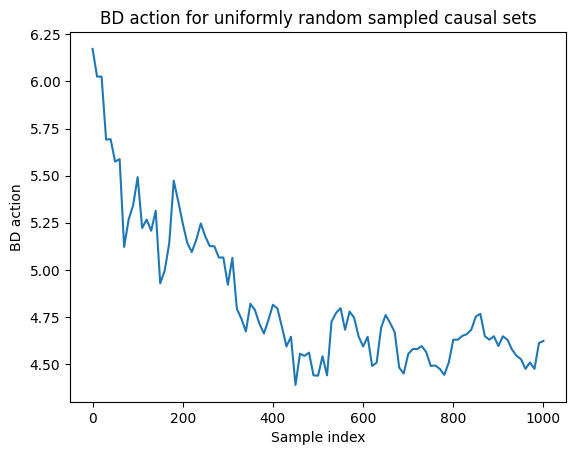

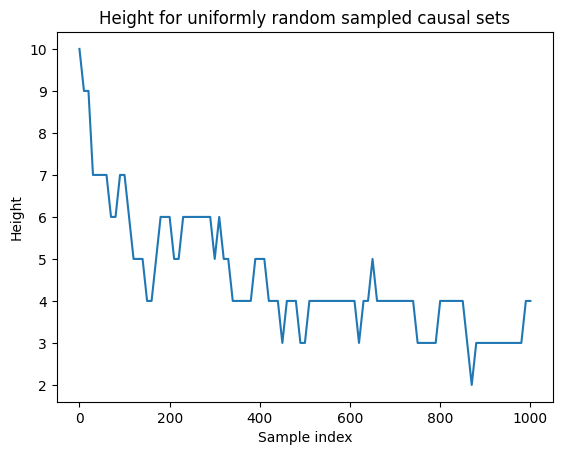

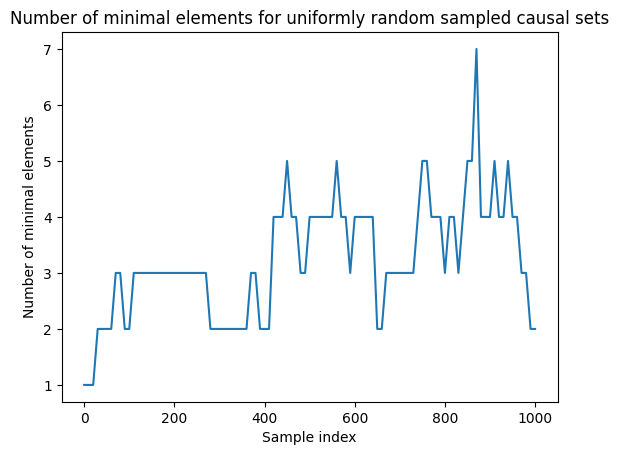

In [8]:
# Cardinality of causal set that we are interested in
cardinality = 10

# Initialise a Quantum sampler
Qsamp = Sampler(cardinality, method="quantum",dimension = 4, qargs = {"gammas":[0.9, 0, 0.1], "t":10, "num_qubits":1})

# Run the sampler for a uniform distribution
results_dir = Qsamp.sample_uniform(num_samples = 100, sample_frequency = 10, T_therm= 0)

print("Results directory keys: ", results_dir.keys())


plt.plot(results_dir["sample_index"], results_dir["BD_action"])
plt.xlabel("Sample index")
plt.ylabel("BD action")
plt.title("BD action for uniformly random sampled causal sets")
plt.show()

plt.plot(results_dir["sample_index"], results_dir["heights"])
plt.xlabel("Sample index")
plt.ylabel("Height")
plt.title("Height for uniformly random sampled causal sets")
plt.show()

plt.plot(results_dir["sample_index"], results_dir["minimal_elements"])
plt.xlabel("Sample index")
plt.ylabel("Number of minimal elements")
plt.title("Number of minimal elements for uniformly random sampled causal sets")
plt.show()



## Weighted sampling

Another thing that we can do, is sampling causal sets not uniformly, but according to the BD-action. See the paper for more details on the sampling process.

cargs recieved :  {'link_move': True, 'relation_move': True}
------------------------------------------------------------
Starting classical algorithm with the following parameters:
Link move:  True
Relation move:  True
s:  111111
s_mat:  [[0 1 1 1]
 [0 0 1 1]
 [0 0 0 1]
 [0 0 0 0]]
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 4587.79it/s]


Time taken:  0.22101736068725586  (per step:  0.00022079656412313272 , per sample  0.0022101736068725585 )
acceptance rate:  0.5674325674325674
self move rate:  0.2967032967032967
forbidden rate:  0.0
Results directory keys:  dict_keys(['bitstring_chain', 'sample_index', 'acceptance_rate', 'self_move_rate', 'forbidden_rate', 'ordering_fractions', 'heights', 'num_relations', 'minimal_elements', 'BD_action'])


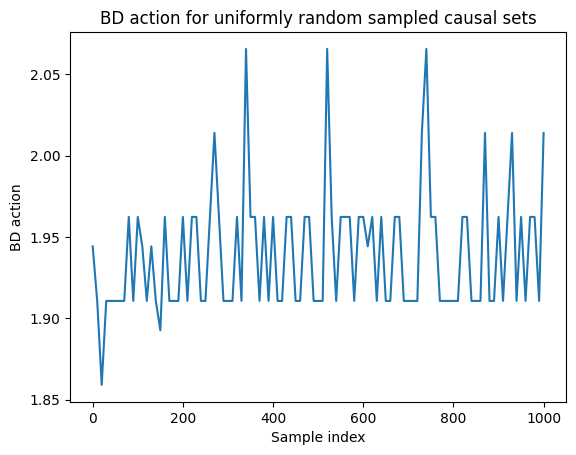

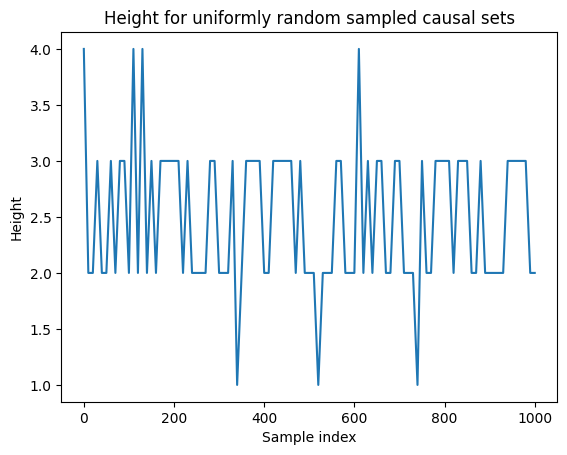

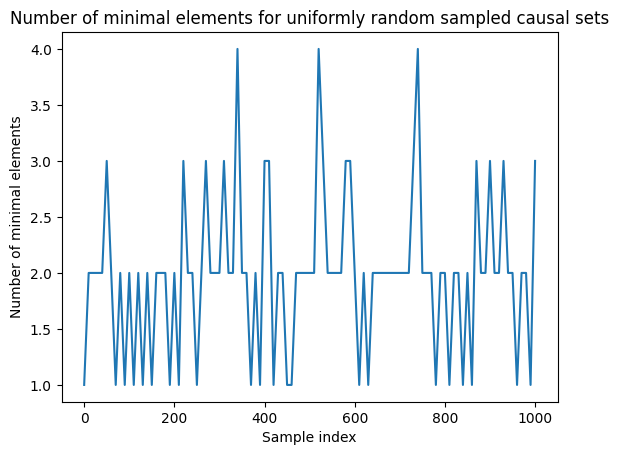

In [ ]:
# Cardinality of causal set that we are interested in
cardinality = 4
temp =0.1
# Initialise a classical sampler, that uses only the link move
csamp = Sampler(cardinality, method="classical", dimension = 4, cargs = {"link_move":True, "relation_move": True})

# Run the sampler for a uniform distribution
results_dir = csamp.sample_BD(T =temp, num_samples = 100, sample_frequency = 10, T_therm= 0)

print("Results directory keys: ", results_dir.keys())


plt.plot(results_dir["sample_index"], results_dir["BD_action"])
plt.xlabel("Sample index")
plt.ylabel("BD action")
plt.title("BD action for uniformly random sampled causal sets")
plt.show()

plt.plot(results_dir["sample_index"], results_dir["heights"])
plt.xlabel("Sample index")
plt.ylabel("Height")
plt.title("Height for uniformly random sampled causal sets")
plt.show()

plt.plot(results_dir["sample_index"], results_dir["minimal_elements"])
plt.xlabel("Sample index")
plt.ylabel("Number of minimal elements")
plt.title("Number of minimal elements for uniformly random sampled causal sets")
plt.show()

## Weighted sampling with QeMCMC

------------------------------------------------------------
Starting quantum algorithm with the following parameters:
gamma_TC:  0.7
gamma_BD:  0.2
gamma_mixing:  0.1
t:  10
s:  111111
s_mat:  [[0 1 1 1]
 [0 0 1 1]
 [0 0 0 1]
 [0 0 0 0]]
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.33it/s]


Time taken:  42.87368655204773  (per step:  0.04283085569635138 , per sample  0.4287368655204773 )
acceptance rate:  0.5744255744255744
self move rate:  0.37962037962037964
forbidden rate:  0.007992007992007992
Results directory keys:  dict_keys(['bitstring_chain', 'sample_index', 'acceptance_rate', 'self_move_rate', 'forbidden_rate', 'ordering_fractions', 'heights', 'num_relations', 'minimal_elements', 'BD_action'])


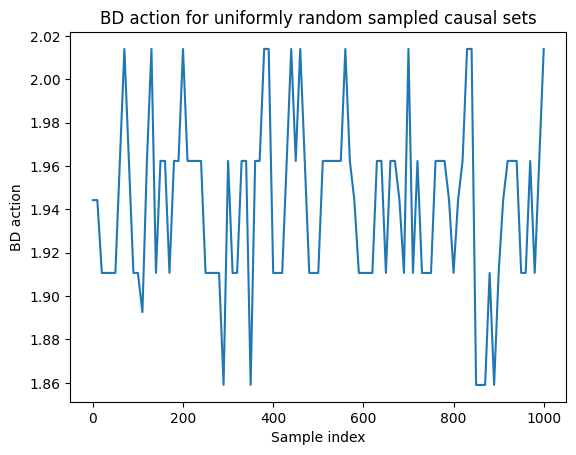

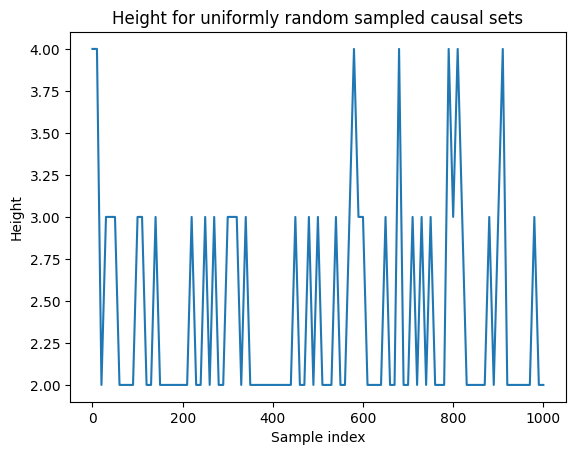

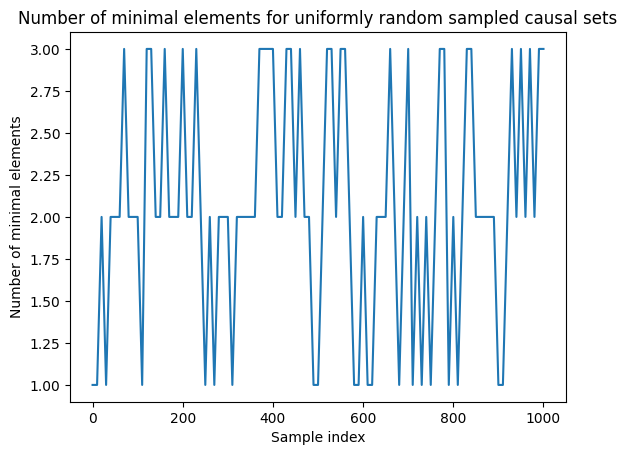

In [10]:
# Cardinality of causal set that we are interested in
cardinality = 4
temp =0.1

# Initialise a Quantum sampler
Qsamp = Sampler(cardinality, method="quantum",dimension = 4, qargs = {"gammas":[0.7, 0.2, 0.1], "t":10})

# Run the sampler for a uniform distribution
results_dir = Qsamp.sample_BD(T = temp,num_samples = 100, sample_frequency = 10, T_therm= 0)

print("Results directory keys: ", results_dir.keys())


plt.plot(results_dir["sample_index"], results_dir["BD_action"])
plt.xlabel("Sample index")
plt.ylabel("BD action")
plt.title("BD action for uniformly random sampled causal sets")
plt.show()

plt.plot(results_dir["sample_index"], results_dir["heights"])
plt.xlabel("Sample index")
plt.ylabel("Height")
plt.title("Height for uniformly random sampled causal sets")
plt.show()

plt.plot(results_dir["sample_index"], results_dir["minimal_elements"])
plt.xlabel("Sample index")
plt.ylabel("Number of minimal elements")
plt.title("Number of minimal elements for uniformly random sampled causal sets")
plt.show()

